# Daftar Isi

## Perkenalan
## Import Pustaka
## Memuat Data
## Pembersihan Data
## Eksplorasi Data
## Data Preprosesing
## Pendefinisian Model
## Pelatihan Model 
## Evaluasi Model
## Kesimpulan

# Perkenalan

## Latar Belakang
- Di Indonesia pada remaja ini marak penggunaan aplikasi pemesanan online. Dimana harga yang diberikan berbeda - beda. Perbedaan ini mulai dari aplikasi pesanan online yang digunakan, cuaca, jam, jarak, dan masih banyak lagi. Hal ini memberikan suatu rumusan masalah. Apakah faktor - faktor tersebut mempengaruhi harga pesanan secara signifikan? Apa saja faktor yang mempengaruhi harga pesanan secara signifikan?

## Data
- Data yang digunakan merupakan dataset dari kaggle dengan judul ''Uber and Lyft Dataset Boston, MA''
- Pada dataset tersebut terdiri dari 57 kolom fitur dan 693071 baris
- Beberapa kolom atau kelas yang tersedia pada dataset adalah sebagai berikut:
    - id = berisi identitas pemesanan 
    - timestamp = catatan digital peristiwa terjadi
    - hour, day, month, datetime = waktu pemesanan (26 Nov-19 Des 2018)
    - timezone = daerah waktu pemesanan
    - source = asal
    - destination = tujuan
    - cab_type = tipe aplikasi yang digunakan Uber dan Lyft
    - terdapat beberapa fitur lain yang berada dalam dataset seperti cuaca, suhu, kecepatan angin, dan jam sore dari data pemesanan
- Dataset ini bersumber dari kaggle dimana berisi pesanan dari aplikasi pesanan online dari Uber dan Lyft yang beroperasi di daerah New York, Amerika

## Tujuan
- Dari uraian latar belakang dan data, diharapkan nantinya kita dapat memprediksi harga untuk pemesanan bergantung pada fitur apa saja dengan menggunakan model regresi linear

# Import Pustaka

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import OneHotEncoder

# Memuat Data

## memanggil data

In [2]:
df = pd.read_csv('rideshare_kaggle.csv')
df.shape

(693071, 57)

- disini kita mengetahui bahwa dataset berisi 57 kolom atau fitur dengan 693071 data pesanan

## 5 data bagian atas

In [3]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


## info kolom

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [5]:
print(df.columns)

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [6]:
for col in df:
    print(f'{col} : {df[col].unique()}')

id : ['424553bb-7174-41ea-aeb4-fe06d4f4b9d7'
 '4bd23055-6827-41c6-b23b-3c491f24e74d'
 '981a3613-77af-4620-a42a-0c0866077d1e' ...
 '64d451d0-639f-47a4-9b7c-6fd92fbd264f'
 '727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e'
 'e7fdc087-fe86-40a5-a3c3-3b2a8badcbda']
timestamp : [1.54495261e+09 1.54328402e+09 1.54336682e+09 ... 1.54377528e+09
 1.54507051e+09 1.54473900e+09]
hour : [ 9  2  1  4  3 18  5 19  6 10 16 22 23  0 14 11  7 20 13  8 12 21 17 15]
day : [16 27 28 30 29 17 26  2  3 13 14  1 18 15  4 10  9]
month : [12 11]
datetime : ['2018-12-16 09:30:07' '2018-11-27 02:00:23' '2018-11-28 01:00:22' ...
 '2018-12-17 07:15:07' '2018-11-30 05:23:02' '2018-11-29 17:38:01']
timezone : ['America/New_York']
source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']
destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South S

In [7]:
for col in df:
    print(f'{col} : {len(df[col].unique())}')

id : 693071
timestamp : 36179
hour : 24
day : 17
month : 2
datetime : 31350
timezone : 1
source : 12
destination : 12
cab_type : 2
product_id : 13
name : 13
price : 148
distance : 549
surge_multiplier : 7
latitude : 11
longitude : 12
temperature : 308
apparentTemperature : 319
short_summary : 9
long_summary : 11
precipIntensity : 63
precipProbability : 29
humidity : 51
windSpeed : 291
windGust : 286
windGustTime : 25
visibility : 227
temperatureHigh : 129
temperatureHighTime : 23
temperatureLow : 133
temperatureLowTime : 31
apparentTemperatureHigh : 124
apparentTemperatureHighTime : 27
apparentTemperatureLow : 136
apparentTemperatureLowTime : 32
icon : 7
dewPoint : 313
pressure : 316
windBearing : 195
cloudCover : 83
uvIndex : 3
visibility.1 : 227
ozone : 274
sunriseTime : 110
sunsetTime : 114
moonPhase : 18
precipIntensityMax : 65
uvIndexTime : 20
temperatureMin : 131
temperatureMinTime : 25
temperatureMax : 128
temperatureMaxTime : 23
apparentTemperatureMin : 137
apparentTemperatureM

## data yang kosong

In [8]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

# Pembersihan Data

## data kosong

- pada data loading kita tahu bahwa terdapat sebanyak 55095 data yang kosong pada kolom price
- data yang kosong dapat dihilangkan dari dataset karena tidak memberikan nilai yang sebanding antara harga dan fitur - fitur yang dicantumkan, sserta akan mengganggu model regresi linear yang akan diterapkan 

In [9]:
df=df[df['price'].isnull()==False]

In [10]:
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [11]:
df.shape

(637976, 57)

- sudah tidak terdapat data yang kosong
- ukuran baris atau data sudah berkurang

## Fitur

### identitas dan time

- kita ketahui bahwa beberapa fitur tidak memiliki kaitan dengan nilai harga atau price.
- data yang tidak berkaitan
    - id (identitas pesanan), 
    - timestamp (identitas pesanan), 
    - datetime, dan time yang lain (sudah diwakili oleh hour, day, month), 
    - long summary (dapat menggunakan data short summary)
    - timezone (hanya 1 saja yaitu New York - Amerika),
    - latitude dan longitude (sudah diwakili dengan destinasi ataupun asal)
- maka data - data tersebut dapat dihilangkan dari data frame kita
- dibuktikan dengan heatmaps. Heatmaps berisi informasi yang menunjukan korelasi antar varibel, apakah terikat pada beberapa variabel tertentu

In [12]:
df_1 = df[['price','id','long_summary','timestamp','datetime','timezone',
           'windGustTime','temperatureHighTime','temperatureLowTime',
           'apparentTemperatureHighTime','apparentTemperatureLowTime',
           'sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
           'temperatureMaxTime','apparentTemperatureMinTime',
           'apparentTemperatureMaxTime','latitude','longitude']]
df_1.head()

,price,id,long_summary,timestamp,datetime,timezone,windGustTime,temperatureHighTime,temperatureLowTime,apparentTemperatureHighTime,apparentTemperatureLowTime,sunriseTime,sunsetTime,uvIndexTime,temperatureMinTime,temperatureMaxTime,apparentTemperatureMinTime,apparentTemperatureMaxTime,latitude,longitude
0,5.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,Rain throughout the day.,1.544953e+09,2018-12-16 09:30:07,America/New_York,1545015600,1544968800,1545048000,1544968800,1545044400,1544962084,1544994864,1544979600,1545012000,1544968800,1545012000,1544958000,42.2148,-71.033
1,11.0,4bd23055-6827-41c6-b23b-3c491f24e74d,"Rain until morning, starting again in the eve...",1.543284e+09,2018-11-27 02:00:23,America/New_York,1543291200,1543251600,1543298400,1543251600,1543291200,1543232969,1543266992,1543251600,1543233600,1543251600,1543291200,1543251600,42.2148,-71.033
2,7.0,981a3613-77af-4620-a42a-0c0866077d1e,Light rain in the morning.,1.543367e+09,2018-11-28 01:00:22,America/New_York,1543334400,1543320000,1543402800,1543320000,1543392000,1543319437,1543353364,1543338000,1543377600,1543320000,1543377600,1543320000,42.2148,-71.033
3,26.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,Partly cloudy throughout the day.,1.543554e+09,2018-11-30 04:53:02,America/New_York,1543514400,1543510800,1543579200,1543510800,1543575600,1543492370,1543526114,1543507200,1543550400,1543510800,1543550400,1543510800,42.2148,-71.033
4,9.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,Mostly cloudy throughout the day.,1.543463e+09,2018-11-29 03:49:20,America/New_York,1543446000,1543420800,1543478400,1543420800,1543460400,1543405904,1543439738,1543420800,1543402800,1543420800,1543392000,1543420800,42.2148,-71.033


<AxesSubplot:>

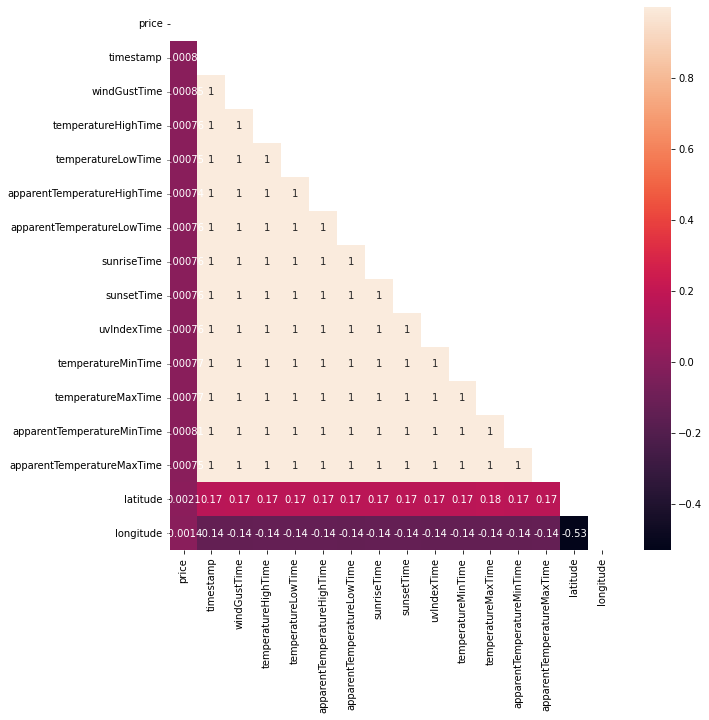

In [13]:
plt.figure(figsize=(10,10))
sb.heatmap(df_1.corr(),annot=True, mask=np.triu(df_1.corr()))

- dari heatmap tersebut dapat kita baca bahwa timestamp dengan fitur time lainnya memiliki nilai yang sama sehingga menunjukan korelasi yang sempurna yaitu 1 dan tidak memiliki korelasi yang tinggi dengan price karena nilainya mendekati 0
- korelasi yang rendah juga ditunjukan pada latitude dan longitude
- untuk data yang berupa object ataupun category memiliki tipe data berupa string dan belum dilabeli sehingga tidak terbaca di heatmap. 
- data dengan bentuk string menunjukan ketidakterikatan dengan price karena alasan yang diuraikan sebelumnya
- sehingga data - data tersebut dapat di drop dari dataset asli

In [14]:
df = df.drop(['id','long_summary','timestamp','datetime','timezone',
              'windGustTime','temperatureHighTime','temperatureLowTime',
              'apparentTemperatureHighTime','apparentTemperatureLowTime',
              'sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
              'temperatureMaxTime','apparentTemperatureMinTime',
              'apparentTemperatureMaxTime','latitude','longitude'],axis=1)
print(df.shape)
df.head()

(637976, 38)


,hour,day,month,source,destination,cab_type,product_id,name,price,distance,...,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,...,0.72,0,10.000,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,2,27,11,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,...,1.00,0,4.786,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,1,28,11,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,...,0.03,0,10.000,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,4,30,11,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,...,0.00,0,10.000,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,3,29,11,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,...,0.44,0,10.000,347.7,0.72,0.0001,33.10,42.18,29.11,35.75


### temperatur

- beberapa fitur terdiri atas temperatur
- kita harus mengetahui apakah fitur temperatur ini memiliki hubungan dengan harga

In [15]:
df.columns

Index(['hour', 'day', 'month', 'source', 'destination', 'cab_type',
       'product_id', 'name', 'price', 'distance', 'surge_multiplier',
       'temperature', 'apparentTemperature', 'short_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'temperatureHigh', 'temperatureLow',
       'apparentTemperatureHigh', 'apparentTemperatureLow', 'icon', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1',
       'ozone', 'moonPhase', 'precipIntensityMax', 'temperatureMin',
       'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax'],
      dtype='object')

In [16]:
df2= df[['price','temperature','apparentTemperature','temperatureHigh',
         'temperatureLow','apparentTemperatureHigh','apparentTemperatureLow',
         'temperatureMin','temperatureMax','apparentTemperatureMin',
         'apparentTemperatureMax']]
df2.head()

,price,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,5.0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,43.68,33.73,38.07
1,11.0,43.58,37.35,47.30,42.10,43.92,36.20,40.49,47.30,36.20,43.92
2,7.0,38.33,32.93,47.55,33.10,44.12,29.11,35.36,47.55,31.04,44.12
3,26.0,34.38,29.63,45.03,28.90,38.53,26.20,34.67,45.03,30.30,38.53
4,9.0,37.44,30.88,42.18,36.71,35.75,30.29,33.10,42.18,29.11,35.75


<AxesSubplot:>

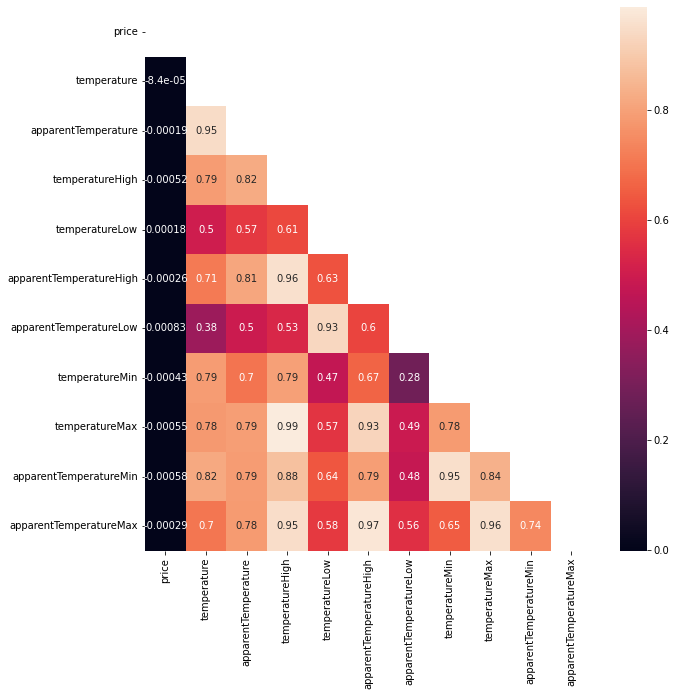

In [17]:
plt.figure(figsize=(10,10))
sb.heatmap(df2.corr(),annot=True, mask=np.triu(df2.corr()))

- fitur temperatur tidak memiliki korelasi dengan harga, sehingga fitur ini bisa di drop 

In [18]:
df = df.drop(['temperature','apparentTemperature','temperatureHigh',
         'temperatureLow','apparentTemperatureHigh','apparentTemperatureLow',
         'temperatureMin','temperatureMax','apparentTemperatureMin',
         'apparentTemperatureMax'],axis=1)
df.head()

,hour,day,month,source,destination,cab_type,product_id,name,price,distance,...,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,9,16,12,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,...,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,2,27,11,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,...,rain,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,1,28,11,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,...,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,4,30,11,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,...,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,3,29,11,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,...,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


## fitur per kategori

In [19]:
category = d.select_dtypes(include=['object','category']).columns.tolist()

for col in category:
    encoder = OneHotEncoder(handle_unknown='ignore')
    enc_df = pd.DataFrame(encoder.fit_transform(df[[col]]).toarray())
    enc_df.columns = encoder.get_feature_names([col])
    df = df.drop(col, axis=1)
    df = pd.concat([df, enc_df], axis=1)

NameError: name 'd' is not defined

In [ ]:
df.head()

#### product_id

In [ ]:
df['product_id'].value_counts()

# Eksplorasi Data

# Data preprosesing

# Pendefinisian Model

# Pelatihan Model

# Evaluasi Model

# Kesimpulan